# Data Collection and Analysis

### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy as stats
import pandas as pd

Load data from file

In [13]:
def load_data(file_path, model=None):
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        data = np.array(data)
    
        
    # load data as dataframe
    if model == 'tql': data = {'scores': data[0], 'apple': data[1], 'time per apple': data[1] / (data[0]/10)}
    else: data = {'scores': data[0],
            'steps_per_game': data[1],
            'epsilon': data[2],
            'game': np.arange(len(data[0])),
            'steps' : np.cumsum(data[1]),
            'time per apple': data[1] / (data[0]/10)
            }
    dataframe = pd.DataFrame(data = data)

    return dataframe 

# Defining data
onestep = load_data(file_path='DQL_PLOT/DATA_PLOTS/onestep_non_training_17_01.pkl')
vector = load_data(file_path='DQL_PLOT/DATA_PLOTS/vector_non_training_17_01.pkl')
tql = load_data(file_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.pkl', model="tql")


df_results = pd.DataFrame(data= {'onestep_score': onestep['scores'], 'vector_score': vector['scores'], 'tql_score': tql['scores']})
df_time = pd.DataFrame(data= {'onestep_time': onestep['time per apple'], 'vector_time': vector['time per apple'], 'tql_time': tql['time per apple']})
df_time.sort_values(by=['vector_time'], inplace=True)
df_time.tail(10)


,onestep_time,vector_time,tql_time
13724,13.766667,120.75,23.384615
19402,13.666667,122.75,22.333333
8666,13.035714,126.25,27.766667
6046,17.125000,450.00,21.964286
3843,16.444444,451.00,23.205128
20434,16.058824,451.00,22.904762
9514,14.611111,453.00,23.750000
1479,13.850000,453.00,25.039216
7572,12.384615,455.00,22.592593
8418,15.466667,462.00,26.444444


## Export CSV

In [72]:
# Export as csv from pickle
def export_csv(dataframe=None, save_path=None):
    return dataframe.to_csv(save_path, index=False)

# input variables
dataframe = tql
save_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.csv'

# Export to csv
export_csv(dataframe, save_path)


## Batch

In [2]:
def get_batch(dataframe, mode='max', batch_size=100):


    # Defining array 
    score = np.array(dataframe['scores'])
    game = np.array(dataframe['steps'])

    # Calculate the number of batches and the size of the last batch
    num_batches = len(score) // batch_size
    last_batch_size = len(score) % batch_size

    # Creating batches
    batched_games = np.array(np.split(score[0: num_batches*batch_size], num_batches))

    if mode == 'mean':
        # Calculating mean of each batch
        batched_rest_mean = np.array(np.mean(score[num_batches*batch_size:]))
        batched_mean = np.mean(batched_games, axis=1)
    if mode == 'max':
        batched_rest_mean = np.array(np.max(score[num_batches*batch_size:]))
        batched_mean = np.max(batched_games, axis=1)

    # Greating batched mean and batched game
    batched_score = np.concatenate((batched_mean, [batched_rest_mean]))
    batched_game = game[::batch_size]

    data = {'score' : batched_score,
            'steps' : batched_game}
    
    batched_df = pd.DataFrame(data = data)

    return batched_df

onestep_max = get_batch(onestep, mode='mean', batch_size=500)

score = np.array(vector['scores'])
convert = len(score)//len(onestep_max)

vector_max = get_batch(vector, mode='mean', batch_size=convert)

score = np.array(vector['scores'])
len(score)//len(onestep_max)

# display(onestep_max, vector_max)




NameError: name 'onestep' is not defined

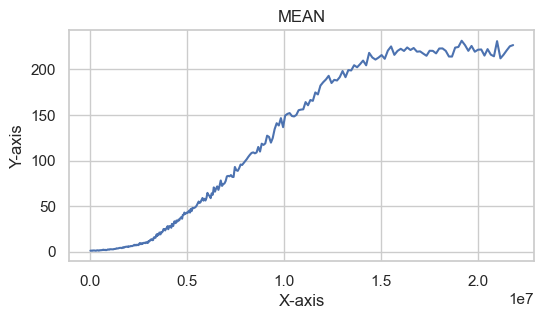

In [78]:
import matplotlib.pyplot as plt

# Create a figure with a 1x2 grid layout (1 row, 2 columns)
plt.figure(figsize=(6,3))  # Adjust the figure size as needed

# Plot the first subplot (left)
plt.plot(onestep_max['steps'], onestep_max['score'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('MEAN')

# Show the plots
plt.show()

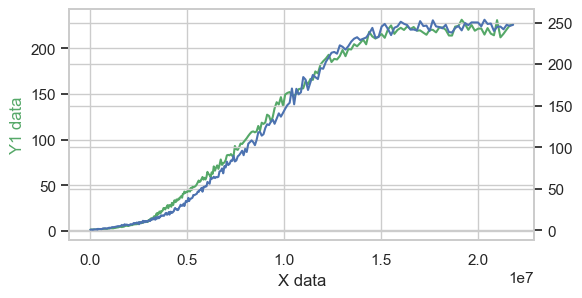

In [77]:
# Define axis
x = onestep_max['steps']
y1 = onestep_max['score']
y2 = vector_max['score'][:304]

# Plot configurations
fig, ax1 = plt.subplots(figsize=(6,3))

# Plot colours
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# axis labels
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Add grid to both axes
ax1.grid(True)
ax2.grid(True)



## Line Plots

C:\Users\vietn\AppData\Local\Temp\ipykernel_13524\4100895772.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_time, shade=True, alpha=0.2)


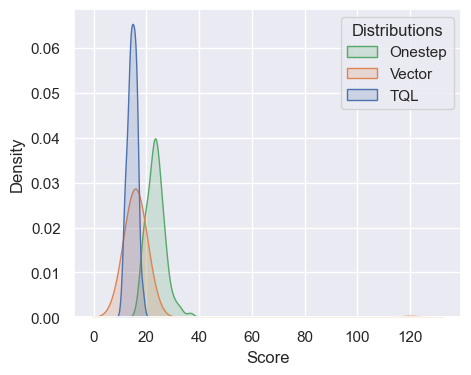

In [8]:
plt.figure(figsize=(5, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.kdeplot(data=df_time, shade=True, alpha=0.2)

# Add labels and a legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Distributions", labels=["Onestep", "Vector", "TQL"])

# Show the plot
plt.show()
